<a href="https://colab.research.google.com/github/SvetLanchY/CompLing/blob/main/Zavet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import re
import os
import os.path 

import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

os.getcwd()
os.listdir()




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['.config', 'sample_data']

In [5]:
from google.colab import files #строка импорта
files.upload()


Saving 7_Noviy_zavet_doc.txt to 7_Noviy_zavet_doc.txt


{'7_Noviy_zavet_doc.txt': b'\xef\xbb\xbf\r\n== \xd0\x95\xd0\xb2\xd0\xb0\xd0\xbd\xd0\xb3\xd0\xb5\xd0\xbb\xd0\xb8\xd0\xb5 \xd0\x9e\xd1\x82 \xd0\x9c\xd0\xb0\xd1\x82\xd1\x84\xd0\xb5\xd1\x8f ==\r\n\r\n=== 1 ===\r\n\r\n1 \xd0\xa0\xd0\xbe\xd0\xb4\xd0\xbe\xd1\x81\xd0\xbb\xd0\xbe\xd0\xb2\xd0\xb8\xd0\xb5 \xd0\x98\xd0\xb8\xd1\x81\xd1\x83\xd1\x81\xd0\xb0 \xd0\xa5\xd1\x80\xd0\xb8\xd1\x81\xd1\x82\xd0\xb0, \xd0\xa1\xd1\x8b\xd0\xbd\xd0\xb0 \xd0\x94\xd0\xb0\xd0\xb2\xd0\xb8\xd0\xb4\xd0\xbe\xd0\xb2\xd0\xb0, \xd0\xa1\xd1\x8b\xd0\xbd\xd0\xb0 \xd0\x90\xd0\xb2\xd1\x80\xd0\xb0\xd0\xb0\xd0\xbc\xd0\xbe\xd0\xb2\xd0\xb0.\r\n2 \xd0\x90\xd0\xb2\xd1\x80\xd0\xb0\xd0\xb0\xd0\xbc \xd1\x80\xd0\xbe\xd0\xb4\xd0\xb8\xd0\xbb \xd0\x98\xd1\x81\xd0\xb0\xd0\xb0\xd0\xba\xd0\xb0; \xd0\x98\xd1\x81\xd0\xb0\xd0\xb0\xd0\xba \xd1\x80\xd0\xbe\xd0\xb4\xd0\xb8\xd0\xbb \xd0\x98\xd0\xb0\xd0\xba\xd0\xbe\xd0\xb2\xd0\xb0; \xd0\x98\xd0\xb0\xd0\xba\xd0\xbe\xd0\xb2 \xd1\x80\xd0\xbe\xd0\xb4\xd0\xb8\xd0\xbb \xd0\x98\xd1\x83\xd0\xb4\xd1\x83 \xd0\xb

In [6]:
with open('7_Noviy_zavet_doc.txt', encoding = "utf-8") as f:
    data = f.read()




In [7]:
!pip install pymystem3==0.1.10
!pip install pymorphy2[fast]

from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem
mystem = Mystem() 
morph = MorphAnalyzer()

  Found existing installation: pymystem3 0.2.0
    Uninstalling pymystem3-0.2.0:
      Successfully uninstalled pymystem3-0.2.0
     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 8.2MB 5.4MB/s 
     |████████████████████████████████| 378kB 48.7MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp37-cp37m-linux_x86_64.whl size=862621 sha256=7f86862a599628ac7e842450100c72e65f517a8cfe81ed1026bf6b4b18637e19
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz


In [33]:
def preprocess(data):
  preprocessed = data.lower().translate(str.maketrans('','',string.punctuation))
  preprocessed = re.sub(r'[\d+,\n+]', '', preprocessed)
  preprocessed = mystem.lemmatize(preprocessed)
  return preprocessed  
print(preprocess(data))
 
 


['\ufeff ', 'евангелие', ' ', 'от', ' ', 'матфей', '    ', 'родословие', ' ', 'иисус', ' ', 'христос', ' ', 'сын', ' ', 'давидова', ' ', 'сын', ' ', 'авраамов', ' ', 'авраам', ' ', 'рожать', ' ', 'исаак', ' ', 'исаак', ' ', 'рожать', ' ', 'иаков', ' ', 'иаков', ' ', 'рожать', ' ', 'иуда', ' ', 'и', ' ', 'брат', ' ', 'он', ' ', 'иуда', ' ', 'рожать', ' ', 'фарес', ' ', 'и', ' ', 'зара', ' ', 'от', ' ', 'фамари', ' ', 'фарес', ' ', 'рожать', ' ', 'есром', ' ', 'есром', ' ', 'рожать', ' ', 'арам', ' ', 'арам', ' ', 'рожать', ' ', 'аминадав', ' ', 'аминадать', ' ', 'рожать', ' ', 'наассон', ' ', 'наассон', ' ', 'рожать', ' ', 'салмон', ' ', 'салмон', ' ', 'рожать', ' ', 'вооз', ' ', 'от', ' ', 'рахава', ' ', 'вооз', ' ', 'рожать', ' ', 'овид', ' ', 'от', ' ', 'руфь', ' ', 'овид', ' ', 'рожать', ' ', 'иессей', ' ', 'иессей', ' ', 'рожать', ' ', 'давид', ' ', 'царь', ' ', 'давид', ' ', 'царь', ' ', 'рожать', ' ', 'соломон', ' ', 'от', ' ', 'бывший', ' ', 'за', ' ', 'урия', ' ', 'соломон', ' 

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


rustopwords = stopwords.words('russian')
rustopwords.extend(['который', 'это', 'свой', 'весь', 'твой', 'ваш', 'наш', ' '])
data1 = [word for word in preprocess(data) if word not in rustopwords]
print(sorted(data1))

In [37]:
from nltk.probability import FreqDist
fdist = FreqDist(data1)
fdist.most_common(10)


[('сказать', 1319),
 ('говорить', 1164),
 ('иисус', 1019),
 ('ибо', 991),
 ('бог', 884),
 ('христос', 506),
 ('иметь', 499),
 ('человек', 499),
 ('божий', 490),
 ('знать', 416)]

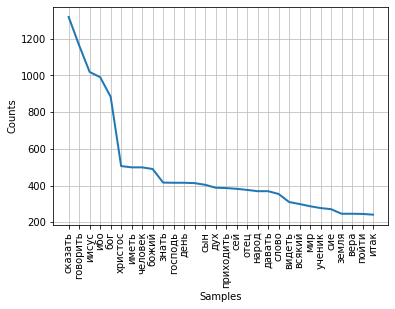

In [38]:
fdist.plot(30,cumulative=False)

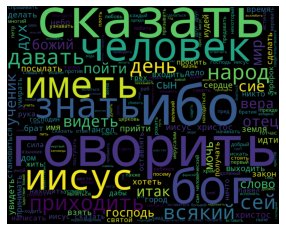

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text_raw = " ".join(data1)
#wordcloud = WordCloud().generate(text_raw)

# wc = WordCloud().generate(text_raw)
# plt.axis("off")
# plt.imshow(wc)

wc = WordCloud(background_color="black", max_words=200, width=1000, height=800).generate(text_raw)# to recolour the image
plt.axis("off")
plt.imshow(wc)
